# Allison Fox Final Project EDA

The Data: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset


From University of Victoria – Information Security and Object Technology (ISOT) Research Lab


The dataset contains two types of articles - fake and real News. This dataset was collected from real world sources; the truthful articles were obtained by crawling articles from Reuters.com (News website). As for the fake news articles, they were collected from different sources. The fake news articles were collected from unreliable websites that were flagged by Politifact (a fact-checking organization in the USA) and Wikipedia. The dataset contains different types of articles on different topics, however, the majority of articles focus on political and World news topics. 

In [80]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re,string,unicodedata

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

In [81]:
# set seed
np.random.seed(100)

In [82]:
# load in the fake data
# columns: title, text, subject, data
fake = pd.read_csv('Fake.csv')
fake.head(20) # to display the first 5 lines of loaded data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be ...",News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar whe...",News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he later had detained by the police for no reason whatsoever, except that maybe his feelings were hurt. Clarke messaged the police to stop Black after he deplaned, and now, a search warrant has been exec...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that he would be back to work the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7V...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered his message just days after members of the United Nations condemned Trump s move to recognize Jerusalem as the capital of Israel. The Pontiff prayed on Monday for the peaceful coexistence of two states within mutually agreed and internationally recognized borders. We see Jesus in the children of the Middle East who continue to suffer because of growing tensions betw...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While He Is In Handcuffs (GRAPHIC IMAGES),"The number of cases of cops brutalizing and killing people of color seems to see no end. Now, we have another case that needs to be shared far and wide. An Alabama woman by the name of Angela Williams shared a graphic photo of her son, lying in a hospital bed with a beaten and fractured face, on Facebook. It needs to be shared far and wide, because this is unacceptable.It is unclear why Williams son was in police custody or what sort of altercation resulted in his arrest, but when you see t...",News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out At FBI Deputy Director And James Comey","Donald Trump spent a good portion of his day at his golf club, marking the 84th day he s done so since taking the oath of office. It must have been a bad game because just after that, Trump lashed out at FBI Deputy Director Andrew McCabe on Twitter follow

In [83]:
# NOTES: in the real news data, we see the text column lists sources, which is not present in the fake news data
# NOTES: some of the sources are from twitter

# load in the true data
# columns: title, text, subject, data
true = pd.read_csv('True.csv')
true.head(20) # to display the first 5 lines of loaded data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they r...",politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits on Monday: Pentagon,"WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting...",politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',"WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigati...",politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,"WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexander Downer, in London was a driving factor behind the FBI’s decision to open a counter-intelligence investigation of Moscow’s contacts with the Trump campaign, the Times reported. Two months after the m...",politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much more' for Amazon shipments,"SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized in the past. “Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!” Trum...",politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spending, immigration","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - The White House said on Friday it was set to kick off talks next week with Republican and Democratic congressional leaders on immigration policy, government spending and other issues that need to be wrapped up early in the new year. The expected flurry of legislative activity comes as Republicans and Democrats begin to set the stage for midterm congressional elections in November. President Donald Trump’s Republican Party is eager to maintain cont...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but timeline unclear: NYT","WEST PALM BEACH, Fla (Reuters) - President Donald Trump said on Thursday he believes he will be fairly treated in a special counsel investigation into Russian meddling in the U.S. presidential election, but said he did not know how long the probe would last. The federal investigation has hung over

# EDA

In [84]:
# print the count of records by subject - fake
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [85]:
# print the count of records by subject - true
true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [86]:
# total count of fake records
fake.shape[0]

23481

In [87]:
# total count of true records
true.shape[0]

21417

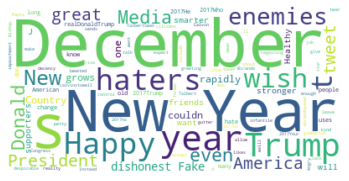

In [88]:
# NOTES: we see things like "t" and "s" coming through as words - we're going to want to clean those up

# word cloud of first article in the fake dataset

# pull the text from the first article
text = fake.text[0]

# Create and generate a word cloud image
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 59838891 words across all the articles.


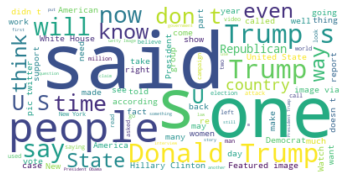

In [89]:
# now lets create a word cloud of all the fake records
text = " ".join(article for article in fake.text)

# print the number of words across all the articles
print ("There are {} words across all the articles.".format(len(text)))

# Create and generate a word cloud image
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save as an image
wordcloud.to_file("img/fake.png")

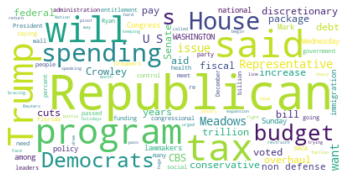

In [90]:
# word cloud of first article in the true dataset

# pull the text from the first article
text = true.text[0]

# Create and generate a word cloud image
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 51064092 words across all the articles.


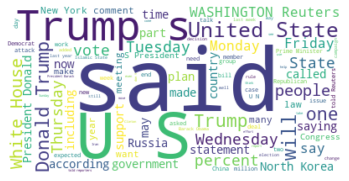

In [91]:
# now lets create a word cloud of all the true records
text = " ".join(article for article in true.text)

# print the number of words across all the articles
print ("There are {} words across all the articles.".format(len(text)))

# Create and generate a word cloud image
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save as an image
wordcloud.to_file("img/true.png")

In [92]:
# add a index column for whether its real or fake so that we can combine the datasets
true['truthness'] = 1
fake['truthness'] = 0

In [93]:
# combine the datasets
df = pd.concat([true, fake])
df.head()

,title,text,subject,date,truthness
0,"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they r...",politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits on Monday: Pentagon,"WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting...",politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',"WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigati...",politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,"WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexander Downer, in London was a driving factor behind the FBI’s decision to open a counter-intelligence investigation of Moscow’s contacts with the Trump campaign, the Times reported. Two months after the m...",politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much more' for Amazon shipments,"SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized in the past. “Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!” Trum...",politicsNews,"December 29, 2017",1


In [94]:
# lets check to make sure we don't have any NA values
df.isna().sum()

title        0
text         0
subject      0
date         0
truthness    0
dtype: int64

In [95]:
# combine the title and text columns into one column
df['titletext'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,date,truthness,titletext
0,"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they r...",politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, whic..."
1,U.S. military to accept transgender recruits on Monday: Pentagon,"WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting...",politicsNews,"December 29, 2017",1,"U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold order..."
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',"WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigati...",politicsNews,"December 31, 2017",1,"Senior U.S. Republican senator: 'Let Mr. Mueller do his job' WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel..."
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,"WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexander Downer, in London was a driving factor behind the FBI’s decision to open a counter-intelligence investigation of Moscow’s contacts with the Trump campaign, the Times reported. Two months after the m...",politicsNews,"December 30, 2017",1,"FBI Russia probe helped by Australian d

In [96]:
# NOTES: could create a column for publication information 
# we can split after the first "-" to separate the publication information from the actual text (in the text variable)
# for index, row in df.iterrows():
#     publisher = row['text'].split(" -", maxsplit = 1)
#     row['publisher'] = publisher[0]
# df.head()

In [97]:
# remove stop words
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['text']=df['text'].apply(stopwords)
df.head()

,title,text,subject,date,truthness,titletext
0,"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) head conservative Republican faction U.S. Congress, voted month huge expansion national debt pay tax cuts, called “fiscal conservative” Sunday urged budget restraint 2018. keeping sharp pivot way among Republicans, U.S. Representative Mark Meadows, speaking CBS’ “Face Nation,” drew hard line federal spending, lawmakers bracing battle January. return holidays Wednesday, lawmakers begin trying pass federal budget fight likely linked issues, immigration policy, even Novembe...",politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, whic..."
1,U.S. military to accept transgender recruits on Monday: Pentagon,"WASHINGTON (Reuters) Transgender people allowed first time enlist U.S. military starting Monday ordered federal courts, Pentagon said Friday, President Donald Trump’s administration decided appeal rulings blocked transgender ban. Two federal appeals courts, one Washington one Virginia, last week rejected administration’s request put hold orders lower court judges requiring military begin accepting transgender recruits Jan. 1. Justice Department official said administration challenge rulings....",politicsNews,"December 29, 2017",1,"U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold order..."
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',"WASHINGTON (Reuters) special counsel investigation links Russia President Trump’s 2016 election campaign continue without interference 2018, despite calls Trump administration allies Republican lawmakers shut down, prominent Republican senator said Sunday. Lindsey Graham, serves Senate armed forces judiciary committees, said Department Justice Special Counsel Robert Mueller needs carry Russia investigation without political interference. “This investigation go forward. investigation conducte...",politicsNews,"December 31, 2017",1,"Senior U.S. Republican senator: 'Let Mr. Mueller do his job' WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel..."
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,"WASHINGTON (Reuters) Trump campaign adviser George Papadopoulos told Australian diplomat May 2016 Russia political dirt Democratic presidential candidate Hillary Clinton, New York Times reported Saturday. conversation Papadopoulos diplomat, Alexander Downer, London driving factor behind FBI’s decision open counter-intelligence investigation Moscow’s contacts Trump campaign, Times reported. Two months meeting, Australian officials passed information came Papadopoulos American counterparts lea...",politicsNews,"December 30, 2017",1,"FBI Russia probe helped by Australian d

In [98]:
# remove punctuation
def punctuation(text):
    text = re.sub("[^A-Za-z0-9 \\n]", " ", text)
    return text
    
df['text']=df['text'].apply(punctuation)
df.head()

,title,text,subject,date,truthness,titletext
0,"As U.S. budget fight looms, Republicans flip their fiscal script",WASHINGTON Reuters head conservative Republican faction U S Congress voted month huge expansion national debt pay tax cuts called fiscal conservative Sunday urged budget restraint 2018 keeping sharp pivot way among Republicans U S Representative Mark Meadows speaking CBS Face Nation drew hard line federal spending lawmakers bracing battle January return holidays Wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even Novembe...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, whic..."
1,U.S. military to accept transgender recruits on Monday: Pentagon,WASHINGTON Reuters Transgender people allowed first time enlist U S military starting Monday ordered federal courts Pentagon said Friday President Donald Trump s administration decided appeal rulings blocked transgender ban Two federal appeals courts one Washington one Virginia last week rejected administration s request put hold orders lower court judges requiring military begin accepting transgender recruits Jan 1 Justice Department official said administration challenge rulings ...,politicsNews,"December 29, 2017",1,"U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold order..."
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',WASHINGTON Reuters special counsel investigation links Russia President Trump s 2016 election campaign continue without interference 2018 despite calls Trump administration allies Republican lawmakers shut down prominent Republican senator said Sunday Lindsey Graham serves Senate armed forces judiciary committees said Department Justice Special Counsel Robert Mueller needs carry Russia investigation without political interference This investigation go forward investigation conducte...,politicsNews,"December 31, 2017",1,"Senior U.S. Republican senator: 'Let Mr. Mueller do his job' WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel..."
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,WASHINGTON Reuters Trump campaign adviser George Papadopoulos told Australian diplomat May 2016 Russia political dirt Democratic presidential candidate Hillary Clinton New York Times reported Saturday conversation Papadopoulos diplomat Alexander Downer London driving factor behind FBI s decision open counter intelligence investigation Moscow s contacts Trump campaign Times reported Two months meeting Australian officials passed information came Papadopoulos American counterparts lea...,politicsNews,"December 30, 2017",1,"FBI Russia probe helped by Australian diplomat tip-off: NYT WASHINGTON (Reuters) - Trump campaig

In [99]:
# remove single character words
pd.options.display.max_colwidth = 500
def singlecharacter(text):
    final_text = []
    words = text.split()
    for i in words:
        if len(i) > 1:
            final_text.append(i)
    return " ".join(final_text)

df['text'] = df['text'].apply(singlecharacter)
df.head()

,title,text,subject,date,truthness,titletext
0,"As U.S. budget fight looms, Republicans flip their fiscal script",WASHINGTON Reuters head conservative Republican faction Congress voted month huge expansion national debt pay tax cuts called fiscal conservative Sunday urged budget restraint 2018 keeping sharp pivot way among Republicans Representative Mark Meadows speaking CBS Face Nation drew hard line federal spending lawmakers bracing battle January return holidays Wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even November congressional election cam...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, whic..."
1,U.S. military to accept transgender recruits on Monday: Pentagon,WASHINGTON Reuters Transgender people allowed first time enlist military starting Monday ordered federal courts Pentagon said Friday President Donald Trump administration decided appeal rulings blocked transgender ban Two federal appeals courts one Washington one Virginia last week rejected administration request put hold orders lower court judges requiring military begin accepting transgender recruits Jan Justice Department official said administration challenge rulings The Department Defen...,politicsNews,"December 29, 2017",1,"U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold order..."
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job',WASHINGTON Reuters special counsel investigation links Russia President Trump 2016 election campaign continue without interference 2018 despite calls Trump administration allies Republican lawmakers shut down prominent Republican senator said Sunday Lindsey Graham serves Senate armed forces judiciary committees said Department Justice Special Counsel Robert Mueller needs carry Russia investigation without political interference This investigation go forward investigation conducted without po...,politicsNews,"December 31, 2017",1,"Senior U.S. Republican senator: 'Let Mr. Mueller do his job' WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel..."
3,FBI Russia probe helped by Australian diplomat tip-off: NYT,WASHINGTON Reuters Trump campaign adviser George Papadopoulos told Australian diplomat May 2016 Russia political dirt Democratic presidential candidate Hillary Clinton New York Times reported Saturday conversation Papadopoulos diplomat Alexander Downer London driving factor behind FBI decision open counter intelligence investigation Moscow contacts Trump campaign Times reported Two months meeting Australian officials passed information came Papadopoulos American counterparts leaked Democrati...,politicsNews,"December 30, 2017",1,"FBI Russia probe helped by Australian diplomat 

There are 37341606 words across all the articles.


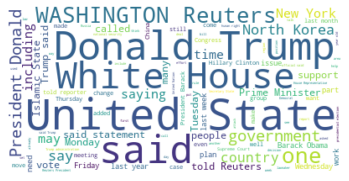

In [103]:
# redo the word cloud for true articles
# now lets create a word cloud of all the true records
truefilt = df[(df['truthness'] == 1)]
text = " ".join(article for article in truefilt.text)

# print the number of words across all the articles
print ("There are {} words across all the articles.".format(len(text)))

# Create and generate a word cloud image
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save as an image
wordcloud.to_file("img/true.png")

There are 42001002 words across all the articles.


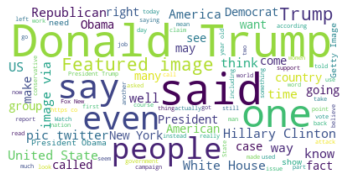

In [104]:
# redo the word cloud for fake articles
# now lets create a word cloud of all the fake records
fakefilt = df[(df['truthness'] == 0)]
text = " ".join(article for article in fakefilt.text)

# print the number of words across all the articles
print ("There are {} words across all the articles.".format(len(text)))

# Create and generate a word cloud image
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save as an image
wordcloud.to_file("img/fake.png")

Word count in longest real article: 2637
Word count in longest fake article: 5183


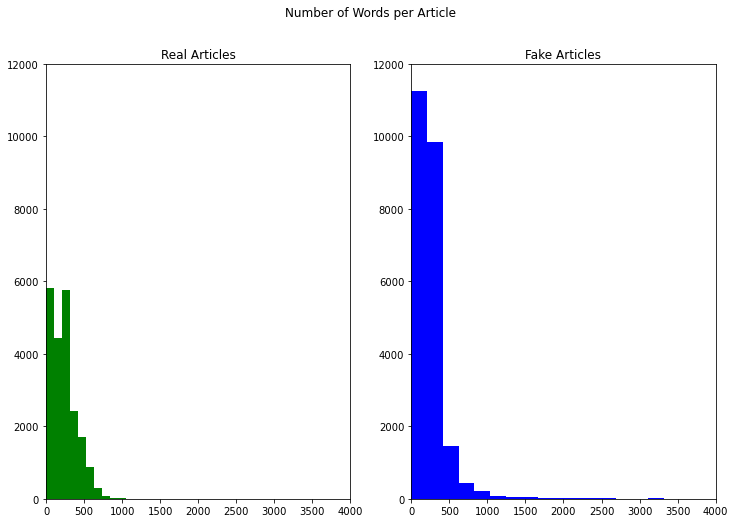

In [122]:
# histogram of word length in fake news compared to histogram of word length in real news
fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (12, 8))
ylim = [0, 12000]
ax1.set_ylim(ylim)
ax2.set_ylim(ylim)
xlim = [0, 4000]
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)
text_length = df[df['truthness'] == 1]['text'].str.split().map(lambda x: len(x))
print("Word count in longest real article:", max(text_length))
ax1.hist(text_length, color='green', bins = 25)
ax1.set_title('Real Articles')
text_length = df[df['truthness'] == 0]['text'].str.split().map(lambda x: len(x))
print("Word count in longest fake article:", max(text_length))
ax2.hist(text_length, color = 'blue', bins = 25)
ax2.set_title('Fake Articles')
fig.suptitle('Number of Words per Article')
plt.show()

Character count in longest real article: 18924
Character count in longest fake article: 39239


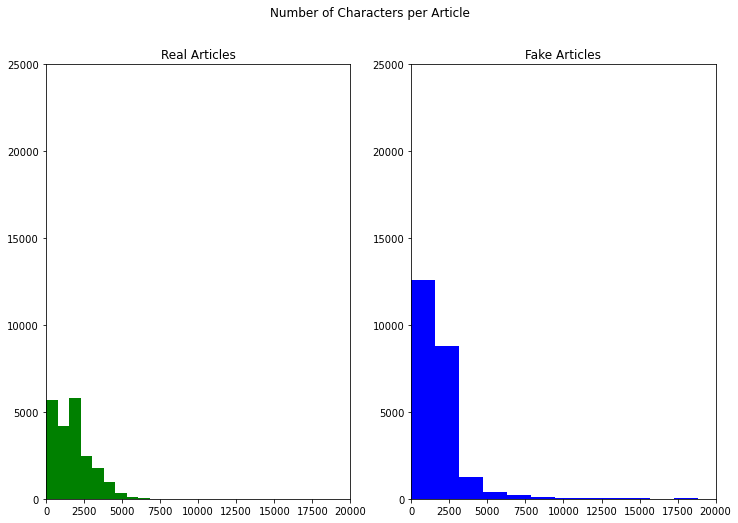

In [118]:
# histogram of character count in fake news compared to histogram of character count in real news
fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (12, 8))
ylim = [0, 25000]
ax1.set_ylim(ylim)
ax2.set_ylim(ylim)
xlim = [0, 20000]
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)
text_length = df[df['truthness'] == 1]['text'].str.len()
print("Character count in longest real article:", max(text_length))
ax1.hist(text_length, color='green', bins = 25)
ax1.set_title('Real Articles')
text_length = df[df['truthness'] == 0]['text'].str.len()
print("Character count in longest fake article:", max(text_length))
ax2.hist(text_length, color = 'blue', bins = 25)
ax2.set_title('Fake Articles')
fig.suptitle('Number of Characters per Article')
plt.show()